# Tensorboard
* tensorboard Test

# Earlystopping
* 어느 정도 결과값이 나오게 되면 멈추게 하는 기능 
* model.fit에서 사용 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print("x_train.shape : ", x_train.shape) 
print("y_train.shape : ", y_train.shape) 

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)


## 2. 모델 구성

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
model = Sequential()
model.add(LSTM(7, input_shape = (5, 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련
* loss : 사용할 loss 함수 
* metrics : 사용할 측정 방식 
    - mes : mean squared error
    - accuracy : 정확도
    - mae : mean absolute error 
* verbose : 훈련하는 과정을 보일것이지 결정 
    - 0 : 보이지 않음
    - 1 : 과정을 보여줌 
    - 2 : 과정을 간단히 보여줌 

In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

#### EarlyStopping 은 실무에서 많이 사용
* monitor는 loss 사용 
* patience=10 : 성능이 증가하지 않는 epoch이 10회이상 반복되면 중지 
* mode='min' : monitor의 loss 값이 min값, 즉 최솟값일 때 적용

In [10]:
tb_hist = TensorBoard(
log_dir='.\\graph', histogram_freq=0,
write_graph=True, write_images=True)

In [11]:
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

In [12]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=1, verbose=2, callbacks=[early_stopping, tb_hist])

Train on 3 samples
Epoch 1/1000
3/3 - 1s - loss: 78.5055 - mse: 78.5055
Epoch 2/1000
3/3 - 0s - loss: 76.3664 - mse: 76.3664
Epoch 3/1000
3/3 - 0s - loss: 74.4193 - mse: 74.4193
Epoch 4/1000
3/3 - 0s - loss: 72.6463 - mse: 72.6463
Epoch 5/1000
3/3 - 0s - loss: 71.1188 - mse: 71.1188
Epoch 6/1000
3/3 - 0s - loss: 69.5328 - mse: 69.5328
Epoch 7/1000
3/3 - 0s - loss: 68.0011 - mse: 68.0011
Epoch 8/1000
3/3 - 0s - loss: 66.7096 - mse: 66.7096
Epoch 9/1000
3/3 - 0s - loss: 65.5150 - mse: 65.5150
Epoch 10/1000
3/3 - 0s - loss: 64.4097 - mse: 64.4097
Epoch 11/1000
3/3 - 0s - loss: 63.4548 - mse: 63.4548
Epoch 12/1000
3/3 - 0s - loss: 62.3834 - mse: 62.3834
Epoch 13/1000
3/3 - 0s - loss: 61.5551 - mse: 61.5551
Epoch 14/1000
3/3 - 0s - loss: 60.7968 - mse: 60.7968
Epoch 15/1000
3/3 - 0s - loss: 59.9295 - mse: 59.9295
Epoch 16/1000
3/3 - 0s - loss: 59.2497 - mse: 59.2497
Epoch 17/1000
3/3 - 0s - loss: 58.6629 - mse: 58.6629
Epoch 18/1000
3/3 - 0s - loss: 57.9273 - mse: 57.9273
Epoch 19/1000
3/3 

Epoch 152/1000
3/3 - 0s - loss: 1.3280 - mse: 1.3280
Epoch 153/1000
3/3 - 0s - loss: 1.1735 - mse: 1.1735
Epoch 154/1000
3/3 - 0s - loss: 0.8388 - mse: 0.8388
Epoch 155/1000
3/3 - 0s - loss: 0.9246 - mse: 0.9246
Epoch 156/1000
3/3 - 0s - loss: 1.0657 - mse: 1.0657
Epoch 157/1000
3/3 - 0s - loss: 1.1036 - mse: 1.1036
Epoch 158/1000
3/3 - 0s - loss: 1.1269 - mse: 1.1269
Epoch 159/1000
3/3 - 0s - loss: 1.0954 - mse: 1.0954
Epoch 160/1000
3/3 - 0s - loss: 1.0470 - mse: 1.0470
Epoch 161/1000
3/3 - 0s - loss: 0.9507 - mse: 0.9507
Epoch 162/1000
3/3 - 0s - loss: 0.9321 - mse: 0.9321
Epoch 163/1000
3/3 - 0s - loss: 0.8992 - mse: 0.8992
Epoch 164/1000
3/3 - 0s - loss: 0.8862 - mse: 0.8862


## 4. 학습과정확인

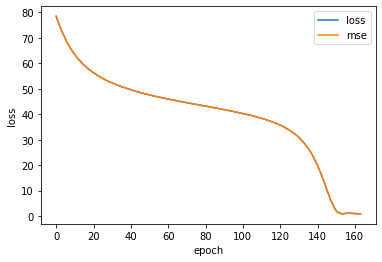

In [13]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 및 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.

In [14]:
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print(x_predict.shape)

(1, 5)
(1, 5, 1)


In [15]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[11.092284]]
